In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from lbm_wetting.utils.structure_prep import read_vti_file

In [6]:
# Create single tube in structure
structure = np.ones((50, 50, 50), dtype=np.uint8) * 255
start_point = (25, 25)
radius = 10
depth = 50

xx, yy = np.indices(
    (structure.shape[0], structure.shape[1])
)

circle = (xx - start_point[0]) ** 2 + (yy - start_point[1]) ** 2 <= radius**2

structure[circle, 0:depth] = 0
np.save("/hpcwork/fw641779/lbm/Test_Tube/structure.npy", structure)

# Save slice image
from PIL import Image
Image.fromarray(structure[:, :, 25]).save("/hpcwork/fw641779/lbm/Test_Tube/slice.png")


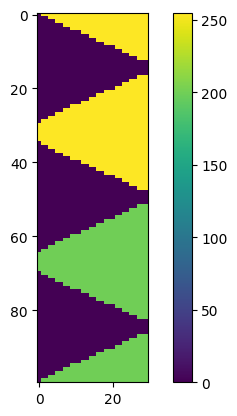

In [11]:
# Create 2D cones with decreasing diameter

structure = np.ones((100, 30,5), dtype=np.uint8) * 255
structure[50:,:,:] = 200

max_radius = 15
min_radius = 2
radii = np.linspace(max_radius, min_radius, structure.shape[1])


mid_points = [15, 85, 50]
for mid_point in mid_points:
    for layer in range(structure.shape[1]):
        radius = int(radii[layer])
        structure[mid_point-radius:mid_point+radius, layer, :] = 0


# Plot structure
plt.imshow(structure[:, :, 2])
plt.colorbar()
plt.show()

# save structure with swapped axes to match the normal structure format
structure = np.swapaxes(structure, 0, 1)
structure = np.swapaxes(structure, 0, 2)
np.save("/hpcwork/fw641779/lbm/Test_Cones/structure.npy", structure)
